<a href="https://colab.research.google.com/github/porygon-tech/ECO/blob/main/demos/tutorial_EVO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/porygon-tech/ECO

Cloning into 'ECO'...
remote: Enumerating objects: 1043, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 1043 (delta 45), reused 61 (delta 32), pack-reused 944 (from 1)
Receiving objects: 100% (1043/1043), 944.46 MiB | 37.43 MiB/s, done.
Resolving deltas: 100% (516/516), done.
Updating files: 100% (356/356), done.


In [2]:
!pip install pickle5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=255312 sha256=0f5ca4cefce26662a9df143fcf84fa37ddbe849c66476b619243775f48b60d94
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5


In [3]:
import sys
sys.path.insert(0,'/content/ECO/lib')

import evo
import numpy as np
import matplotlib.pyplot as plt
import matriX as mx

# Setup
Let us create a population object of 500 individuals with 100 loci coding for a quantitative trait. This trait's phenotypic value will range from 200 to 650.

The population's genetic state can be shown as a matrix of N x nloci

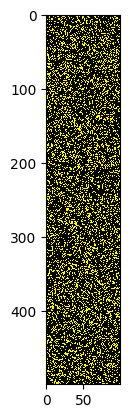

In [4]:
N=500 # population size
nloci = 100
skw = 0.25 #skew, frequency of additive alleles at all loci
ps = (200,650)
pop = evo.population(N,nloci, skew= skw,phenoSpace=ps);pop.show()

The trait distribution can be shown in this histogram of 40 bins.

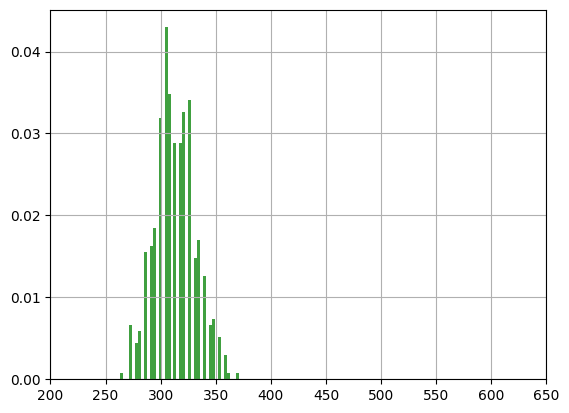

(array([0.00074074, 0.        , 0.        , 0.00666667, 0.        ,
        0.00444444, 0.00592593, 0.        , 0.01555556, 0.        ,
        0.0162963 , 0.01851852, 0.        , 0.03185185, 0.        ,
        0.04296296, 0.03481481, 0.        , 0.02888889, 0.        ,
        0.02888889, 0.03259259, 0.        , 0.03407407, 0.        ,
        0.01481481, 0.01703704, 0.        , 0.01259259, 0.        ,
        0.00666667, 0.00740741, 0.        , 0.00518519, 0.        ,
        0.00296296, 0.00074074, 0.        , 0.        , 0.00074074]),
 array([263. , 265.7, 268.4, 271.1, 273.8, 276.5, 279.2, 281.9, 284.6,
        287.3, 290. , 292.7, 295.4, 298.1, 300.8, 303.5, 306.2, 308.9,
        311.6, 314.3, 317. , 319.7, 322.4, 325.1, 327.8, 330.5, 333.2,
        335.9, 338.6, 341.3, 344. , 346.7, 349.4, 352.1, 354.8, 357.5,
        360.2, 362.9, 365.6, 368.3, 371. ]),
 <BarContainer object of 40 artists>)

In [5]:
pop.hist(40)

We can define any adaptive landscape for the phenotype. We make here a linear one that assigns a fitness of 0 to the lowest and a fitness of 20 to the highest phenotype value.

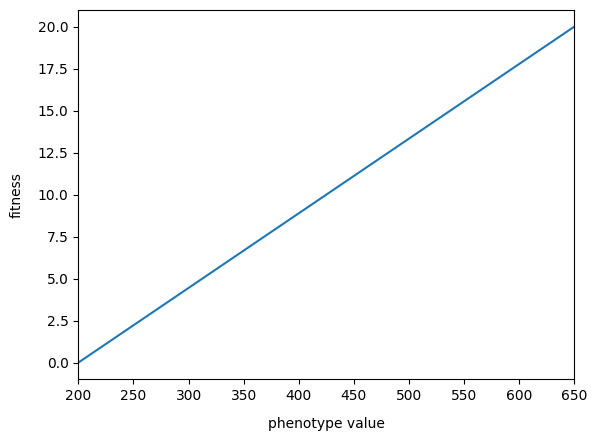

In [6]:
def f(x):
  global ps
  return (x - ps[0])/np.diff(ps)*20
pop.set_fitnessLandscape(f)
pop.showfitness()

To reproduce the population 200 generations we run

In [12]:
c=pop.reproduce(200)

To see the changes in population

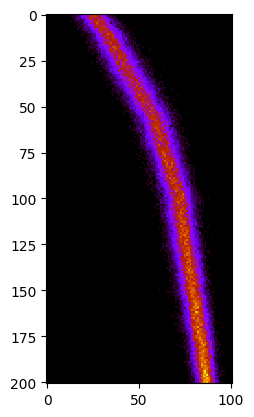

In [8]:
evo.showdata(c.history)

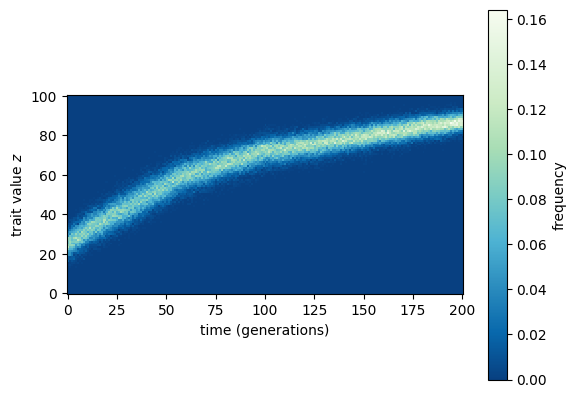

In [10]:
plt.imshow(c.history.T, interpolation='none', cmap='GnBu_r',origin='lower')
plt.colorbar(label='frequency')
plt.xlabel("time (generations)")
plt.ylabel(r"trait value $z$")
plt.show()


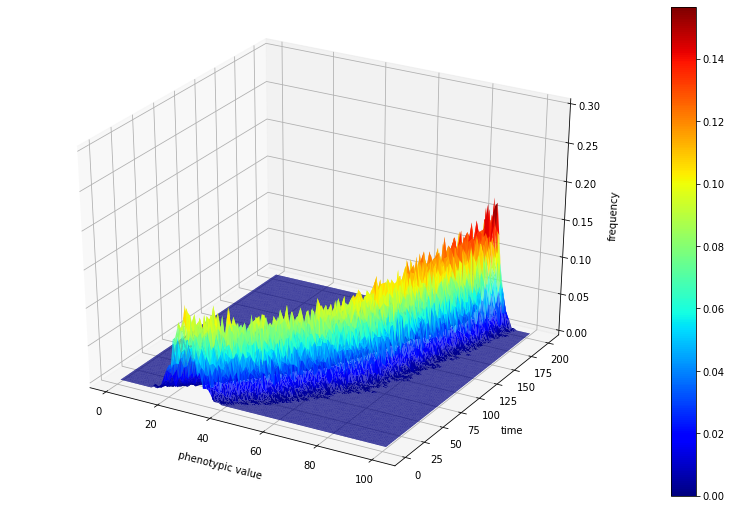

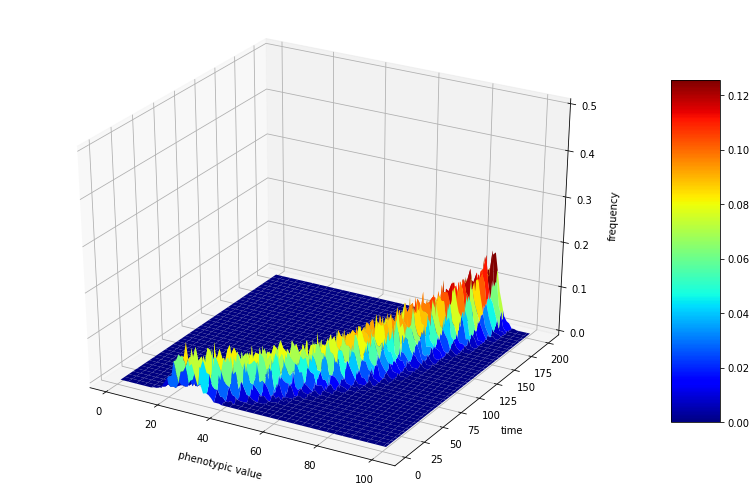

In [ ]:
#mat=genData[:,:30]
mat=c.history
height, width = mat.shape
xi = np.linspace(1, width, width)
yi = np.linspace(1, height, height)
axx, axy = np.meshgrid(xi, yi)

fig = plt.figure(figsize =(14, 9)); ax = fig.add_subplot(projection='3d')
surf = ax.plot_trisurf(axx.flatten(),axy.flatten(),mat.flatten(), cmap=plt.cm.jet, linewidth=0)
ax.set_zlim3d(0,0.3)
ax.set_xlabel('phenotypic value', labelpad=10)
ax.set_ylabel('time', labelpad=10)
ax.set_zlabel('frequency', labelpad=10)
fig.colorbar(surf)
plt.show()

fig = plt.figure(figsize =(14, 9)); ax = plt.axes(projection ='3d')
surf = ax.plot_surface(axx,axy,mat, cmap=plt.cm.jet, edgecolor ='none')
ax.set_zlim3d(0,0.5)
ax.set_xlabel('phenotypic value', labelpad=10)
ax.set_ylabel('time', labelpad=10)
ax.set_zlabel('frequency', labelpad=10)
fig.colorbar(surf, ax = ax, shrink = 0.7, aspect = 7)
plt.show()


Population size is kept constant. In a finite population we can expect some alleles to become fixed, thus reducing the population's genetic variability. Let's compare the original population ```pop``` with the one after 200 generations, ```c```.

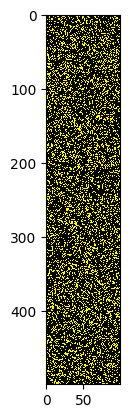

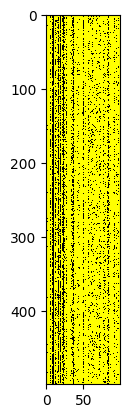

In [14]:
pop.show()
c.show()


MAF profiles

array([0.192, 0.132, 0.028, 0.   , 0.   , 0.238, 0.39 , 0.   , 0.23 ,
       0.216, 0.01 , 0.006, 0.45 , 0.032, 0.112, 0.11 , 0.24 , 0.   ,
       0.094, 0.244, 0.   , 0.158, 0.4  , 0.15 , 0.084, 0.292, 0.064,
       0.344, 0.182, 0.   , 0.   , 0.004, 0.024, 0.064, 0.214, 0.316,
       0.   , 0.296, 0.05 , 0.028, 0.202, 0.014, 0.104, 0.13 , 0.05 ,
       0.05 , 0.   , 0.   , 0.362, 0.03 , 0.494, 0.09 , 0.002, 0.076,
       0.   , 0.03 , 0.   , 0.296, 0.1  , 0.456, 0.082, 0.136, 0.212,
       0.106, 0.104, 0.08 , 0.034, 0.058, 0.142, 0.122, 0.034, 0.104,
       0.234, 0.146, 0.102, 0.02 , 0.   , 0.218, 0.328, 0.16 , 0.138,
       0.   , 0.   , 0.222, 0.448, 0.076, 0.   , 0.048, 0.   , 0.   ,
       0.   , 0.066, 0.302, 0.   , 0.228, 0.14 , 0.054, 0.174, 0.086,
       0.   ])

# the predict function
These calculations can be predicted analytically instead of through simulations

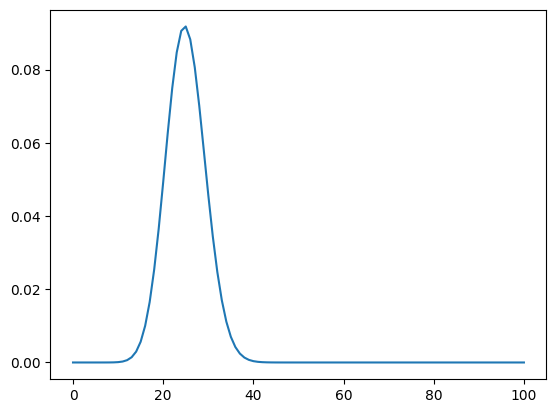

In [ ]:
nstates = nloci+1
v0 = np.c_[np.array([evo.bindist(nloci,i,skw) for i in range(nstates)])]
mx.showlist(v0)

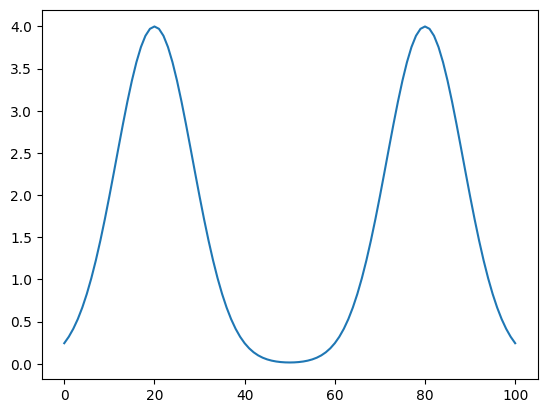

In [ ]:
l = evo.interactors.pM(np.arange(nstates)-20,0.007) + evo.interactors.pM(np.arange(nstates)-80,0.007)
l = np.c_[np.array(4*l)]
mx.showlist(l)

In [ ]:
from os import chdir
from pathlib import Path
import pickle5
import bz2
chdir('/content/ECO')
root = Path(".")
obj_path = root / 'data/obj'

filename='oc_tensor_' + str(nloci) + '.obj'
with bz2.BZ2File(obj_path / filename, 'rb') as f:
	h = pickle5.load(f)

Iterating...
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


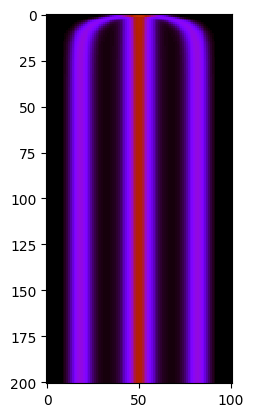

In [ ]:
temp_nt=200
traj = evo.predict(v0,l,h=h,a=-0.0001, ntimesteps=temp_nt) ; mx.showdata(traj)

In [ ]:
traj = evo.predict(v0,l,h=h,a=+0.0001, ntimesteps=temp_nt) ; mx.showdata(traj)

In [ ]:
ps

(500, 600)

Iterating...


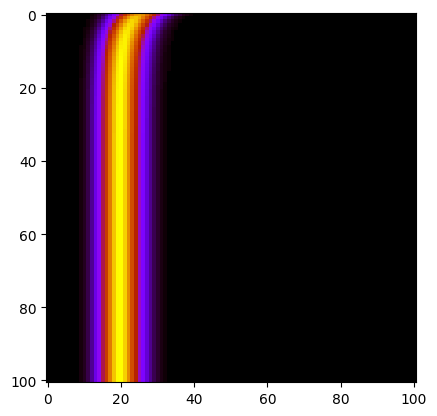

In [ ]:

v0
l
ntimesteps=100
mut=0.
a=0.

v0 = np.c_[list(v0)]
nstates=len(v0)
if type(mut) == float:
    mut= evo.generate_mut_matrix(nstates,mu=mut)

states = np.linspace(ps[0],ps[1], nstates)
statesdiff=np.outer(np.ones(nstates),states)-np.outer(states,np.ones(nstates))
assortMat = evo.interactors.pM(statesdiff,alpha=abs(a))
if a<0:
    assortMat = 1 - assortMat

v = np.zeros((ntimesteps+1, nstates,1))
v[0] = v0


print('Iterating...')
for t in range(1,ntimesteps+1):
#for t in range(1,10):
    w = v[t-1]*l
    w = ((w.T @ assortMat).T * w)/w.sum()
    v[t] = ((w.T @ h @ w) / w.sum()**2)[:,0]
    v[t] = mut @ v[t]

mx.showdata(v)